In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, kstest
from itertools import combinations

pd.set_option('display.max_columns', None) 

import warnings
warnings.filterwarnings("ignore")

# Pair programming Estadística Descriptiva

## Ejercicios estadística descriptiva

En este caso usaremos el mismo DataFrame que hemos estado usando en los últimos pairs. El ejercicio que os planteamos es:

Eres un analista de datos que trabaja para una organización internacional que se enfoca en el desarrollo y el bienestar de los países. Tu objetivo es realizar un análisis inicial de estadísticas descriptivas sobre varios países utilizando el conjunto de datos proporcionado.

**Objetivo:** Realizar un análisis de estadísticas descriptivas para comprender mejor la situación de los países en términos de diversos indicadores.

**Instrucciones:**

1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:

- Media

- Mediana

- Desviación estándar

- Mínimo

- Máximo

In [2]:
df = pd.read_csv("data/world_data_full_apply_nulos.csv", index_col = 0)
df.head(2)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
density,195.0,1.345045e+02,1.573068e+02,1.265000e+00,2.616850e+01,8.300000e+01,1.655000e+02,8.470000e+02
agricultural_land,188.0,3.911755e+01,2.178305e+01,6.000000e-01,2.170000e+01,3.960000e+01,5.537500e+01,8.260000e+01
land_area,165.0,2.552127e+02,2.583850e+02,0.000000e+00,4.127700e+01,1.484600e+02,4.300000e+02,9.640000e+02
armed_forces_size,166.0,1.037831e+02,1.671580e+02,0.000000e+00,1.025000e+01,2.850000e+01,1.282500e+02,9.360000e+02
birth_rate,189.0,2.021497e+01,9.945774e+00,5.900000e+00,1.130000e+01,1.795000e+01,2.875000e+01,4.608000e+01
calling_code,194.0,3.605464e+02,3.232364e+02,1.000000e+00,8.250000e+01,2.555000e+02,5.067500e+02,1.876000e+03
co2-emissions,183.0,1.259155e+02,1.817949e+02,1.016000e+00,7.600000e+00,3.447700e+01,1.850305e+02,7.279730e+02
cpi,175.0,1.441936e+02,5.478400e+01,9.903000e+01,1.136700e+02,1.247400e+02,1.559250e+02,5.509300e+02
cpi_change,179.0,6.722346e+00,2.445041e+01,-4.300000e+00,1.000000e+00,2.300000e+00,4.250000e+00,2.549000e+02
fertility_rate,188.0,2.698138e+00,1.282267e+00,9.800000e-01,1.705000e+00,2.245000e+00,3.597500e+00,6.910000e+00


2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [6]:
indice_maximo = df['density'].idxmax()
indice_minimo = df['density'].idxmin()

In [7]:
pais_maximo = df.loc[indice_maximo, 'country'] 
pais_minimo = df.loc[indice_minimo, 'country']

pais_maximo

'Palestinian National Authority'

In [8]:
pais_minimo

'Bangladesh'

3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [13]:
media_birth = df['birth_rate'].mean()
print(f"La media de la tasa de nacimientos es: {np.round(media_birth, 2)}")

La media de la tasa de nacimientos es: 20.21


4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [16]:
def mortalidad_infantil_analisis (dataframe): # min: 1.5/ mediana: 14/ max: 84.5

    baja = []
    moderada = []
    alta = []

    for indice, value in enumerate(dataframe['infant_mortality']): 
        if value < 10:
            baja.append(df.loc[indice, 'country'])
        elif value >= 10 and value <= 30:
            moderada.append(df.loc[indice, 'country'])
        else:
            alta.append(df.loc[indice, 'country'])

    print(f"Los paises con baja mortalidad son: {baja}")
    print(f"Los paises con media mortalidad son: {moderada}")
    print(f"Los paises con alta mortalidad son: {alta}")
    return 

In [17]:
mortalidad_infantil_analisis(df)

Los paises con baja mortalidad son: ['Albania', 'Andorra', 'Antigua and Barbuda', 'Argentina', 'Australia', 'Austria', 'The Bahamas', 'Bahrain', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Brunei', 'Bulgaria', 'Canada', 'Chile', 'China', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Republic of Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives', 'Malta', 'Monaco', 'Montenegro', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saint Kitts and Nevis', 'San Marino', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay']
Los paises con media mortalidad son: ['Algeria', 'Ar

5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [18]:
tabla_contingencia = pd.crosstab(df['fertility_rate'], df['life_expectancy'], normalize=True, margins=True) * 100

tabla_contingencia

life_expectancy,52.8,53.7,54.0,54.3,57.1,57.4,57.6,58.0,58.4,58.9,60.2,60.4,60.8,61.2,61.5,61.7,62.0,63.0,63.4,63.5,63.7,63.8,63.9,64.1,64.3,64.5,64.7,65.0,65.1,65.2,65.9,66.1,66.2,66.3,66.6,66.7,66.9,67.1,67.3,67.6,67.7,67.8,68.1,68.7,69.1,69.3,69.4,69.6,69.7,69.8,70.2,70.3,70.5,70.8,70.9,71.1,71.2,71.3,71.4,71.5,71.6,71.8,72.1,72.3,72.4,72.7,72.8,72.9,73.1,73.2,73.4,73.6,73.8,73.9,74.1,74.2,74.3,74.4,74.5,74.7,74.9,75.0,75.1,75.3,75.4,75.5,75.7,75.8,76.0,76.1,76.5,76.6,76.7,76.8,76.9,77.0,77.1,77.2,77.3,77.4,77.6,77.8,78.1,78.2,78.3,78.5,78.6,78.7,78.9,79.0,79.1,80.0,80.1,80.8,80.9,81.0,81.3,81.6,81.7,81.8,81.9,82.1,82.3,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.3,83.6,84.2,85.4,All
fertility_rate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.534759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.534759
1.14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.534759,0.000000,0.000000,0.000000,0.000000,0.534759
1.23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

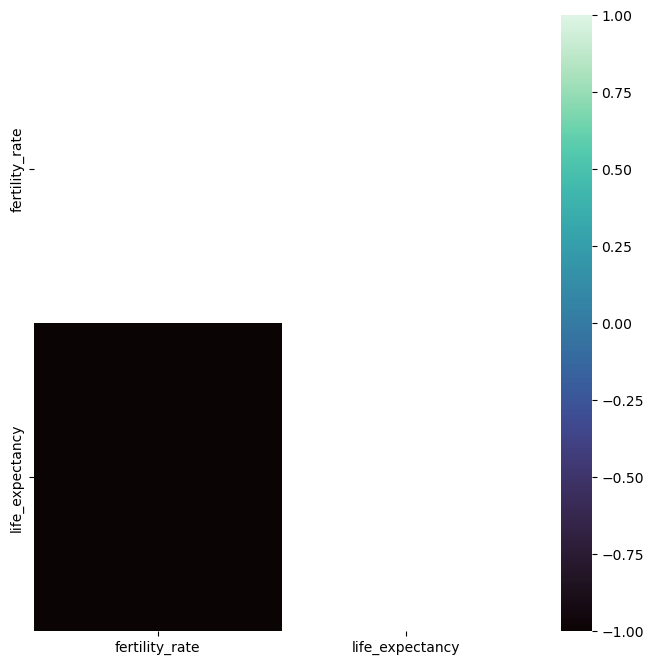

In [19]:
columnas = ['fertility_rate', 'life_expectancy']
df_col = df[columnas]
df_correlaciones = df_col.corr(method='spearman')
df_correlaciones


plt.figure(figsize = (8, 8))

mask = np.triu(np.ones_like(df_correlaciones.corr(), dtype=bool))

sns.heatmap(df_correlaciones.corr(), 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask);

**Bonus:**

6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.



9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.